## 1.2.1 

$u_t=-\lambda u\\ \Rightarrow u e^{\lambda t}=C$

And u(0)=1 then C=1 $\Rightarrow ue^{\lambda t}=1$

Now for h=3, A=4, $\rho=10$, V=9 and c=1 and $\lambda=\frac{hA}{\rho Vc}$

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
t=np.linspace(0,10)
h=3;A=4;rho=10;V=9;c=1
lamda=h*A/(rho*V*c)

In [6]:
u=1/np.exp(lamda*t)

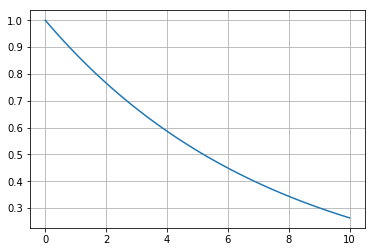

In [13]:
plt.plot(t,u);plt.grid()

In [23]:
u_2=1/np.exp(lamda*2)
u_2

0.7659283383646487

## 1.2.4

In [48]:
u_0=0;g=9.8;mu=1.69*10**(-5); rhoa=0.9;rhop=917;a=0.01
volp=4*np.pi*a**3/3; mp=rhop*volp
t=np.arange(0,25,0.25)
t=t[::-1]
Re=np.zeros(np.shape(t)[0]);cd=np.zeros(np.shape(t)[0]);v=np.zeros(np.shape(t)[0])
D=np.zeros(np.shape(t)[0])
D[0]=mp*g; v[0]=g-(D[0]/mp); Re[0]=2*rhoa*v[0]*a/mu
for i in range(1,np.shape(t)[0]):
    Re[i]=2*rhoa*v[i-1]*a/mu
    cd[i]=(24/Re[i])+(6/(1+np.sqrt(Re[i])))+0.4
    D[i]=0.5*rhoa*v[i-1]**2*np.pi*a**2*cd[i]
    v[i]=v[i-1]-0.25*(g-D[i]/mp)


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [47]:
g-(D[0]/mp)

0.0

# 1.3.5

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
b=[0,0,0,0,1]
A=np.array([[1,1, 0, 0,-1],
          [0, -1, 1, 1,-1],
          [0, 1/2, 0, -1,-1/2],
          [0, -1/6, 0, 1/2,-1/6],
          [0, 1/24, 0, -1/6,-1/24]])

In [4]:
x=(-1/6)*np.matmul(np.linalg.inv(A),b)
x

array([-4.,  5.,  4.,  2.,  1.])

## Lecture 2 excercise

### Best implicit one-step method
[$\alpha,\beta_1,\beta_2,1$]

In [25]:
b=[0,0,0,1]
A=np.array([[1,0,0,-1],
           [0,1,1,-1],
           [0,1,0,1/2],
           [0,1/2,0,1/6]])
x=np.matmul(np.linalg.inv(A),b)
x/-12

array([-1. , -0.5, -0.5,  1. ])

# Homework 1
## 1)
$v^{n+1}=\alpha_1 v^n+\alpha_2 v^{n-1}+\beta_1\Delta tf(v^n)+\beta_2\Delta tf(v^{n-1})$

In [10]:
A=np.array([[1,1,0,0,-1],
           [0,-1,1,1,-1],
           [0,1/2,0,-1,-1/2],
           [0,-1/6,0,1/2,-1/6],
           [0,1/24,0,-1/6,-1/24]])
b=[0,0,0,0,1]
x=np.matmul(np.linalg.inv(A),b)
x[0:-1]/x[-1]

array([-4.,  5.,  4.,  2.])

## 2)
$v^{n+1}=\alpha_1 v^n+\alpha_2 v^{n-1}+\beta_0\Delta tf(v^{n+1})+\beta_1\Delta tf(v^n)+\beta_2\Delta tf(v^{n-1})$

In [18]:
A=np.array([[1,1,0,0,0,-1],
           [0,-1,1,1,1,-1],
           [0,1/2,1,0,-1,-1/2],
           [0,-1/6,1/2,0,1/2,-1/6],
           [0,1/24,1/6,0,-1/6,-1/24],
           [0,-1/120,1/24,0,1/24,-1/120]])
b=[0,0,0,0,0,1]
x=np.matmul(np.linalg.inv(A),b)
print(x)
print(x[0:-1]/x[-1])

[  0.  90.  30. 120.  30.  90.]
[0.         1.         0.33333333 1.33333333 0.33333333]


# Lecture 3: Pendulum problem

In [29]:
import numpy as np
import matplotlib.pyplot as plt
def derivate (g,l,u):
    theta=u[0]
    theta_dot=u[1]
    theta_ddot=-g*theta/l
    return np.array([theta_dot,theta_ddot])


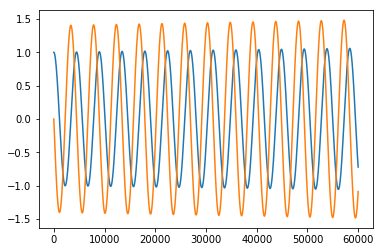

In [49]:
#Forward euler
u0=np.array([1,0]);g=9.8;l=5
dt=0.001;T=60;history=[]
for t in np.arange(0,T,dt):
    dudt=derivate(g,l,u0)
    u=u0+dt*dudt
    u0=u
    history.append(u0)
plt.plot(history)

# Lecture 4
## Balistics Problem
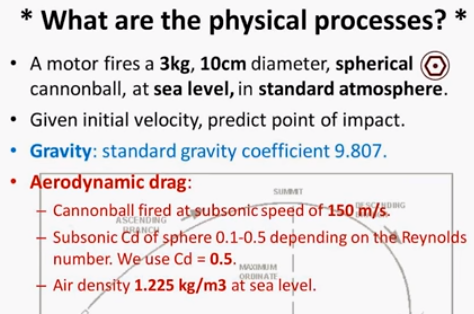

### Differential Equations:
1) $dx/dt=u_x$

2) $dy/dt=u_y$

3) $m(du_x/dt)=-\frac{1}{2} C_d \rho \sqrt{u_x^2+u_y^2}u_x A$

4) $m(du_y/dt)=-\frac{1}{2} C_d \rho \sqrt{u_x^2+u_y^2}u_y A$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#u=[u_x,u_y,x,y]
def derivate (cd,rho,d,m,u):#Params: cd=Drag Coeff; rho= Air density; d= Ball Diameter; m= Mass; vector of initialization
    ux=u[0];x=u[2]
    uy=u[1];y=u[3]
    u_norm=np.sqrt(ux**2+uy**2)
    A=np.pi*d**2/4
    ux_dot=-0.5*cd*(rho/m)*ux*A*u_norm
    uy_dot=(-0.5*cd*(rho/m)*uy*A*u_norm)-9.807
    return np.array([ux_dot,uy_dot,ux,uy])

In [14]:
#Constants
cd=0.5; rho=1.225; d=0.1; m=3; v0=150; theta=np.pi/4

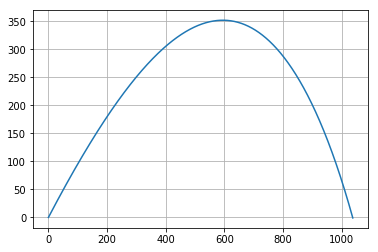

In [15]:
#Forward Euler
u0=[v0*np.cos(theta),v0*np.sin(theta),0,0]
history=[]; posy=0; dt=0.01
history.append(u0)
while (posy>=0):
    dudt=derivate(cd,rho,d,m,u0)
    u=u0+dt*dudt
    posy=u0[3]
    u0=u
    history.append(u0)
results=np.asarray(history)
plt.plot(results[:,2],results[:,3]); plt.grid()

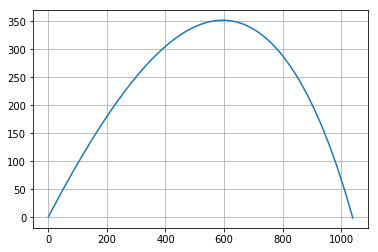

In [36]:
#Midpoint
u0=[v0*np.cos(theta),v0*np.sin(theta),0,0]
history=[]; posy=0; dt=0.01
u=u0+dt*derivate(cd,rho,d,m,u0)
u00=u0
u0=u
history.append(u0)
while (posy>=0):
    dudt=derivate(cd,rho,d,m,u0)
    u=u00+2*dt*dudt
    posy=u0[3]
    u00=u0
    u0=u
    history.append(u0)
results=np.asarray(history)
plt.plot(results[:,2],results[:,3]); plt.grid()

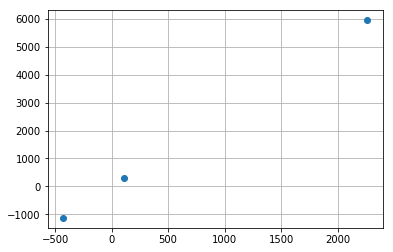

In [41]:
# Most accurate 2 step explicit
u0=[v0*np.cos(theta),v0*np.sin(theta),0,0]
history=[]; posy=0; dt=0.001
u00=u0
u0=u
history.append(u0)
while (posy>=0):
    dudt=derivate(cd,rho,d,m,u0)
    dudt0=derivate(cd,rho,d,m,u00)
    u=-4*np.asarray(u0)+5*np.asarray(u00)+4*dt*dudt+2*dt*dudt0
    posy=u0[3]
    u00=u0
    u0=u
    history.append(u0)
results=np.asarray(history)
plt.plot(results[:,2],results[:,3],'o'); plt.grid()

This Happens Because this scheme is not zero stable